In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pyprocessmacro import Process

## Analysis and Visualizations

In [3]:
df = pd.read_csv("super_clean_df_with_sentiment.csv")

In [4]:
# Drop irrelevant for the project columns
drop_columns = ['business_id','user_id', "text", "Sentiment Score"]

df = df.drop(drop_columns, axis=1)
df.head(3)

,stars,review_stars,temperature,precipitation,weathercode,windspeed,Sentiment score,Sentiment score breakdown,Hedonometer sentiment score,Sentiment Polarity,Sentiment Subjectivity
0,4.0,4,13.2,0.0,2.0,9.7,0.9538,"{'neg': 0.0, 'neu': 0.596, 'pos': 0.404}",4.960226,0.450000,0.512500
1,4.0,5,18.2,0.0,3.0,14.8,0.8957,"{'neg': 0.0, 'neu': 0.617, 'pos': 0.383}",4.978862,0.225694,0.533333
2,4.5,5,23.1,0.0,1.0,42.2,0.8555,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412}",4.996883,0.120000,0.360000


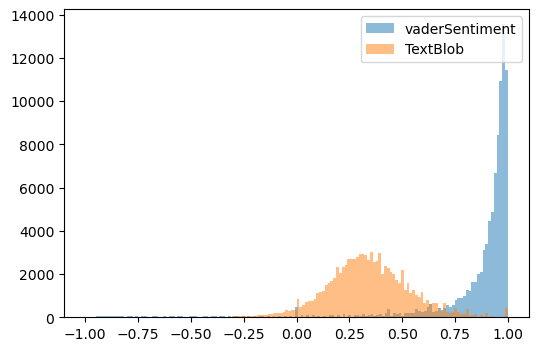

In [5]:
# Plot original sentiment scores
plt.figure(figsize=(6,4))

x1 = df['Sentiment score']
x3 = df['Sentiment Polarity']
 
# Plot on each subplot
plt.hist(x1, bins = 150, alpha=0.5, label='vaderSentiment')
plt.hist(x3, bins = 150, alpha=0.5, label='TextBlob')
plt.legend(loc='upper right')

# Show the plot
plt.show()

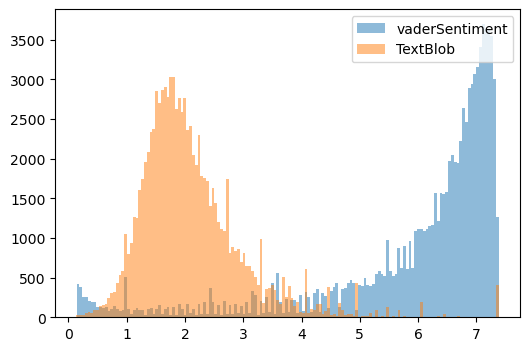

In [6]:
# Plot sentiment scores
plt.figure(figsize=(6,4))

x1 = np.exp(df['Sentiment score'])**2
x3 = np.exp(df['Sentiment Polarity'])**2
 
# Plot on each subplot
plt.hist(x1, bins = 150, alpha=0.5, label='vaderSentiment')
plt.hist(x3, bins = 150, alpha=0.5, label='TextBlob')
plt.legend(loc='upper right')

# Show the plot
plt.show()

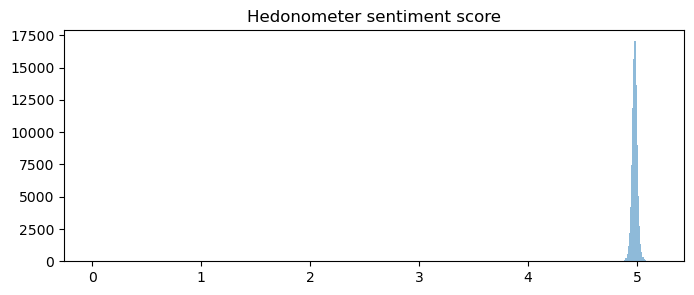

In [7]:
# Plot original Hedonometer
plt.figure(figsize=(8,3))

data = df['Hedonometer sentiment score']
plt.hist(data, bins = 500, alpha=0.5)
plt.title('Hedonometer sentiment score')

plt.show()

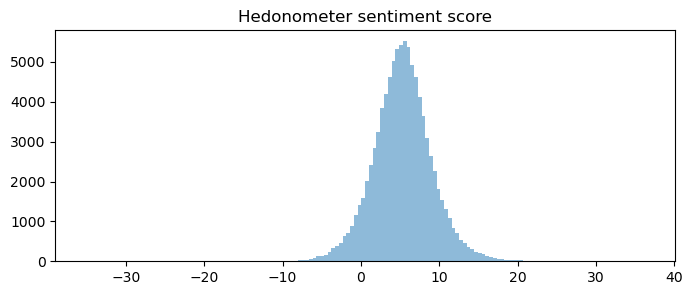

In [8]:
# Plot scaled Hedonometer
plt.figure(figsize=(8,3))

data = df['Hedonometer sentiment score']
plt.hist(np.where(data > 0, np.exp(data)-140, data), bins = 150, alpha=0.5)
plt.title('Hedonometer sentiment score')

plt.show()

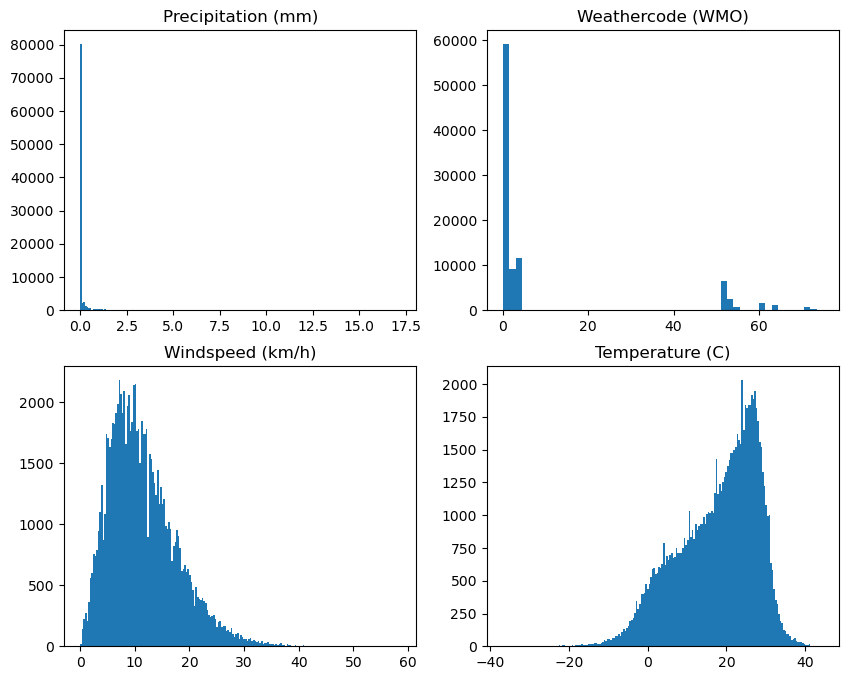

In [9]:
# Plot weather data
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.hist(df['precipitation'], bins = 200)
plt.title('Precipitation (mm)')

plt.subplot(2,2,2)
plt.hist(df['weathercode'], bins = 50)
plt.title('Weathercode (WMO)')

plt.subplot(2,2,3)
plt.hist(df['windspeed'], bins = 200)
plt.title('Windspeed (km/h)')

plt.subplot(2,2,4)
plt.hist(df['temperature'], bins = 200)
plt.title('Temperature (C)')

plt.show()

# Model 4

## vaderSentiment

In [17]:
# Model 4
pr = Process(data=df, model=4, x="precipitation", y="Sentiment score",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
pr.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = precipitation
    y = Sentiment score
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000  -0.0000 0.0879 0.3328    4  93946   0.8561

Coefficients

                coeff     se        t      p    LLCI   ULCI
Cons           0.8420 0.0028 300.9075 0.0000  0.8365 0.8475
precipitation  0.0015 0.0021   0.7141 0.4752 -0.0026 0.0055
temperature   -0.0001 0.0001  -0.8328 0.4050 -0.0003 0.0001
weathercode   -0.0000

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [15]:
# Model 5 (additional)
pl = Process(data=df, model=5, x="precipitation", y="Sentiment score", w = "temperature",
            m=["weathercode", "windspeed"], controls_in="all")
pl.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 5

Variables:
    Cons = Cons
    x = precipitation
    y = Sentiment score
    w = temperature
    m1 = weathercode
    m2 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000  -0.0000 0.0879 0.3033    5  93945   0.9112

Coefficients

                            coeff     se        t      p    LLCI   ULCI
Cons                       0.8421 0.0028 299.4515 0.0000  0.8366 0.8476
precipitation             -0.0006 0.0052  -0.1136 0.9096 -0.0108 0.0096
temperature               -0.0001 0.0001  -0.9

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


## Hedonometer

In [7]:
# Model 4
h = Process(data=df, model=4, x="precipitation", y="Hedonometer sentiment score",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
h.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = precipitation
    y = Hedonometer sentiment score
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Hedonometer sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000  -0.0000 0.0020 0.7792    4  93946   0.5385

Coefficients

                coeff     se          t      p    LLCI   ULCI
Cons           4.9787 0.0004 11834.5361 0.0000  4.9779 4.9795
precipitation  0.0004 0.0003     1.2001 0.2301 -0.0002 0.0010
temperature   -0.0000 0.0000    -1.1811 0.2376 -0.0

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [9]:
# Model 5
hl = Process(data=df, model=5, x="precipitation", y="Hedonometer sentiment score", w = "temperature",
            m=["weathercode", "windspeed"], controls_in="all")
hl.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 5

Variables:
    Cons = Cons
    x = precipitation
    y = Hedonometer sentiment score
    w = temperature
    m1 = weathercode
    m2 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Hedonometer sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000  -0.0000 0.0020 0.6250    5  93945   0.6807

Coefficients

                            coeff     se          t      p    LLCI   ULCI
Cons                       4.9787 0.0004 11775.5638 0.0000  4.9778 4.9795
precipitation              0.0004 0.0008     0.5574 0.5773 -0.0011 0.0020
temperature     

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


## TextBlob

In [7]:
# Model 4 (moderated via Sentiment Subjectivity)
t = Process(data=df, model=4, x="precipitation", y="Sentiment Polarity",
            m=["Sentiment Subjectivity", "temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = precipitation
    y = Sentiment Polarity
    m1 = Sentiment Subjectivity
    m2 = temperature
    m3 = weathercode
    m4 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment Polarity 
OLS Regression Summary

     R²  Adj. R²    MSE         F  df1    df2  p-value
 0.1384   0.1384 0.0354 3019.3427    5  93945   0.0000

Coefficients

                         coeff     se        t      p    LLCI    ULCI
Cons                   -0.0135 0.0033  -4.1386 0.0000 -0.0199 -0.0071
precipitation           0.0011 0.0013   0.8189 0.4128 -0.0015  0.0036
Sentime

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [9]:
# Model 4 (w/o moderation)
t = Process(data=df3, model=4, x="precipitation", y="Sentiment Polarity",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = precipitation
    y = Sentiment Polarity
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment Polarity 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1    df2  p-value
 0.0008   0.0007 0.0411 17.8896    4  93946   0.0000

Coefficients

                coeff     se        t      p    LLCI   ULCI
Cons           0.3229 0.0019 168.8380 0.0000  0.3192 0.3267
precipitation  0.0005 0.0014   0.3430 0.7316 -0.0023 0.0032
temperature    0.0005 0.0001   8.3080 0.0000  0.0004 0.0007
weathercode  

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [8]:
# Model 5
t = Process(data=df, model=5, x="precipitation", y="Sentiment Polarity", w = "Sentiment Subjectivity",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 5

Variables:
    Cons = Cons
    x = precipitation
    y = Sentiment Polarity
    w = Sentiment Subjectivity
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment Polarity 
OLS Regression Summary

     R²  Adj. R²    MSE         F  df1    df2  p-value
 0.1385   0.1384 0.0354 2516.1286    6  93944   0.0000

Coefficients

                                       coeff     se        t      p    LLCI    ULCI
Cons                                 -0.0133 0.0033  -3.9863 0.0001 -0.0198 -0.0067
precipitation                        -0.0009 0.004

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


## Experimental

In [118]:
# Model 4 (vader)
tem = Process(data=df, model=4, x="temperature", y="Sentiment score",
            m=["precipitation"])
tem.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = temperature
    y = Sentiment score
    m1 = precipitation

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000  -0.0000 0.0879 0.3614    2  93948   0.6967

Coefficients

                coeff     se        t      p    LLCI   ULCI
Cons           0.8411 0.0020 425.5993 0.0000  0.8372 0.8449
temperature   -0.0001 0.0001  -0.7831 0.4336 -0.0003 0.0001
precipitation  0.0006 0.0016   0.3494 0.7268 -0.0026 0.0038

------------------------------------------------------------

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [116]:
# Model 4 (TextBlob)
tem = Process(data=df, model=4, x="temperature", y="Sentiment Polarity",
            m=["precipitation"])
tem.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = temperature
    y = Sentiment Polarity
    m1 = precipitation

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Sentiment Polarity 
OLS Regression Summary

     R²  Adj. R²    MSE       F  df1    df2  p-value
 0.0007   0.0007 0.0411 33.8776    2  93948   0.0000

Coefficients

                coeff     se        t      p    LLCI   ULCI
Cons           0.3246 0.0014 240.3469 0.0000  0.3220 0.3273
temperature    0.0005 0.0001   8.2297 0.0000  0.0004 0.0007
precipitation -0.0004 0.0011  -0.3586 0.7199 -0.0026 0.0018

----------------------------------------------------

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


In [117]:
# Model 4 (Hedonometer)
tem = Process(data=df, model=4, x="temperature", y="Hedonometer sentiment score",
            m=["precipitation"])
tem.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 4

Variables:
    Cons = Cons
    x = temperature
    y = Hedonometer sentiment score
    m1 = precipitation

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = Hedonometer sentiment score 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0000   0.0000 0.0020 1.5304    2  93948   0.2165

Coefficients

                coeff     se          t      p    LLCI   ULCI
Cons           4.9787 0.0003 16757.4576 0.0000  4.9781 4.9792
temperature   -0.0000 0.0000    -1.1773 0.2391 -0.0000 0.0000
precipitation  0.0003 0.0002     1.3213 0.1864 -0.0002 0.0008

----------------------------

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")


# Model 7

In [7]:
# vaderSentiment
t = Process(data=df, model=7, x="precipitation", y="review_stars", w = "Sentiment score",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 7

Variables:
    Cons = Cons
    x = precipitation
    y = review_stars
    w = Sentiment score
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = review_stars 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0002   0.0002 0.8390 4.8539    4  93946   0.0007

Coefficients

               coeff     se        t      p    LLCI   ULCI
Cons          4.4972 0.0086 520.2607 0.0000  4.4803 4.5142
precipitation 0.0060 0.0063   0.9448 0.3448 -0.0064 0.0184
temperature   0.0012 0.0003   4.1448 0.0000  0.0007 0.0018
weather

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional op

In [6]:
# TextBlob
t = Process(data=df, model=7, x="precipitation", y="review_stars", w = "Sentiment Polarity",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 7

Variables:
    Cons = Cons
    x = precipitation
    y = review_stars
    w = Sentiment Polarity
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = review_stars 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0002   0.0002 0.8390 4.8539    4  93946   0.0007

Coefficients

               coeff     se        t      p    LLCI   ULCI
Cons          4.4972 0.0086 520.2607 0.0000  4.4803 4.5142
precipitation 0.0060 0.0063   0.9448 0.3448 -0.0064 0.0184
temperature   0.0012 0.0003   4.1448 0.0000  0.0007 0.0018
weat

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional op

In [8]:
# Hedonometer
t = Process(data=df, model=7, x="precipitation", y="review_stars", w = "Hedonometer sentiment score",
            m=["temperature", "weathercode", "windspeed"], controls_in="all")
t.summary()

Process successfully initialized.
Based on the Process Macro by Andrew F. Hayes, Ph.D. (www.afhayes.com)


****************************** SPECIFICATION ****************************

Model = 7

Variables:
    Cons = Cons
    x = precipitation
    y = review_stars
    w = Hedonometer sentiment score
    m1 = temperature
    m2 = weathercode
    m3 = windspeed

Sample size:
93951

Bootstrapping information for indirect effects:
Final number of bootstrap samples: 5000
Number of samples discarded due to convergence issues: 0

***************************** OUTCOME MODELS ****************************

Outcome = review_stars 
OLS Regression Summary

     R²  Adj. R²    MSE      F  df1    df2  p-value
 0.0002   0.0002 0.8390 4.8539    4  93946   0.0007

Coefficients

               coeff     se        t      p    LLCI   ULCI
Cons          4.4972 0.0086 520.2607 0.0000  4.4803 4.5142
precipitation 0.0060 0.0063   0.9448 0.3448 -0.0064 0.0184
temperature   0.0012 0.0003   4.1448 0.0000  0.0007 0.

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  llci = np.percentile(samples, plow * 100, interpolation="lower")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:34: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  ulci = np.percentile(samples, phigh * 100, interpolation="higher")
C:\Users\user\anaconda3\envs\myenv\lib\site-packages\pyprocessmacro\utils.py:33: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional op